**https://github.com/thewall27/Image-Segmentation/blob/master/4.Image%20Segmentation%20based%20on%20Clustering.ipynb**

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(850, 1332, 3)


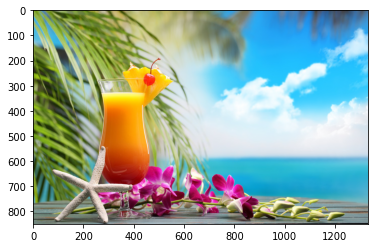

In [ ]:
pic = plt.imread('/content/drive/MyDrive/Computer Vision/Image Segmentation/Data/juice.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [ ]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(1132200, 3)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

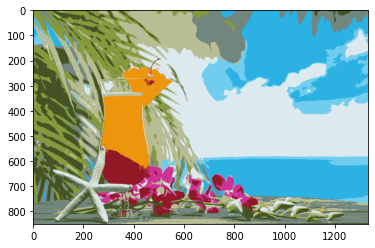

In [ ]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

In [ ]:

import math
n=int(input("Enter the number of points = "))
l1=[]
l2=[]
for i in range (1,n+1):
    l1.append(int(input("Enter the x-co-ordinate of %d point = "%(i))))
    l2.append(int(input("Enter the y-co-ordinate of %d point = "%(i))))
l=zip(l1,l2)                            #combines the 2lists to create a list of tuples #((1,1),(2,1))
p=list(l)                               #converts l to list           [(1,1),(2,1)]
print("The points are = ",p)
a=int(input("Enter the number of clusters = "))
k=[]
b=[]
for i in range (0,a):                   #a -> no. of clusters
    m=list(p[i])                        #converts each tuple(consisting of co-ordinates) to list [[1,1],[2,1]]
    k.append(m)                         #list carrying the centroids
    b.append(m)                         #copy of centroids used later to chk if the repeat 
print("The centroids are = ",k)
print()
y=[]                                    #distance matrix
while True:
    for j in range (0,a):    
        x=[]                            #sublist in y considering dist of each pt from each cluster
        for i in range (0,n):
            q=math.pow(p[i][0]-k[j][0],2)
            w=math.pow(p[i][1]-k[j][1],2)
            t=math.sqrt(q+w)
            x.append(t)
            h=list(x)
        y.append(h)
    print("The distance of all points from centroid is : ")
    print()
    for i in range (0,a):
        for j in range (0,n):
            v=y[i][j]
            print("{:.2f}".format(v))      # a=13.946 print("{0:.2f}".format(a)) #13.95
        print()
    print()
    g=[]                                #new cluster
    for i in range (0,a):
        g.append([])                    #creating sublists in g which is equal to no. of clusters
    for i in range (0,n):
        min1=y[0][i]                    #dist of pt from 1st cluster
        for j in range (1,a):
            if(min1>y[j][i]):
                g[j].append(i)
            else:
                g[0].append(i)
    print("New clusters are :",g)
    print()
    k.clear()                           #cal new centroids
    for i in range(0,a):
        j=0
        s1=0.0
        s2=0.0
        while(j<len(g[i])):
            e=g[i][j]
            s1=s1+l1[e]
            s2=s2+l2[e]
            j=j+1
        c1=s1/len(g[i])
        c2=s2/len(g[i])
        k.append([c1,c2])
    print("The new centroids are = ",k)
    print()
    x.clear()
    y.clear()
    g.clear()
    if(b==k):
        break
    else:
        b.clear()
        b=k
print()
print("Final centroids are = ",k)